In [12]:
import cosima_cookbook as cc
import numpy as np
import xarray as xr
import glob, sys
import matplotlib.pyplot as plt
sys.path.append("/g/data/x77/ps7863/python_scripts")
import helper_functions as helper
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cmcrameri


import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

import climtas.nci

from dask.distributed import Client
from palettable.scientific.sequential import * 
from palettable.scientific.diverging import * 

figdir = '/g/data/x77/ps7863/figures/AABW_variability/'

In [13]:
climtas.nci.GadiClient()

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 28
Total threads: 28,Total memory: 126.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39385,Workers: 28
Dashboard: /proxy/8787/status,Total threads: 28
Started: 3 hours ago,Total memory: 126.00 GiB
Comm: tcp://127.0.0.1:34873,Total threads: 1
Dashboard: /proxy/42645/status,Memory: 4.50 GiB
Nanny: tcp://127.0.0.1:43003,


In [14]:
session = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
iaf_cycle3 = '01deg_jra55v140_iaf_cycle3'
expt = '01deg_jra55v140_iaf_cycle3_antarctic_tracers'

In [15]:
lon_slice = slice(80-360, 190-360)
lat_slice = slice(-72, -55)

In [16]:
ht = cc.querying.getvar(iaf_cycle3,'ht',session, n=1) 
ht = ht.sel(yt_ocean = lat_slice).sel(xt_ocean=lon_slice)
land_mask = np.squeeze(ht.values)
land_mask = land_mask * 0
land_mask[np.isnan(land_mask)] = 1
yt_ocean =ht.yt_ocean.values
xt_ocean =ht.xt_ocean.values
land_mask_masked = np.ma.masked_where((land_mask==0),land_mask)

In [17]:
shelf_mask = ht > 1000
shelf_mask = shelf_mask.astype(bool)
masked_shelf = shelf_mask.where(shelf_mask==0, np.nan)
shelf_mask = shelf_mask.where(shelf_mask==1, np.nan)

In [7]:
ALBW_peak_month = xr.open_dataset('/g/data/x77/ps7863/data/AABW_variability/ALBW_concentration_peak_month_1958-2018_2.nc')
ALBW_peak_month = ALBW_peak_month['passive_adelie']

In [18]:
def add_colorbar(ax, data, ticks=None, extend=None):
    fontsize = 12
    axins = inset_axes(ax, width = "3%", height = "100%", loc = 'lower left',
                   bbox_to_anchor = (1.02, 0., 1, 1), bbox_transform = ax.transAxes,
                   borderpad = 0)
    cbar = fig.colorbar(data, cax = axins, ticks=ticks, extend=extend)
    return cbar

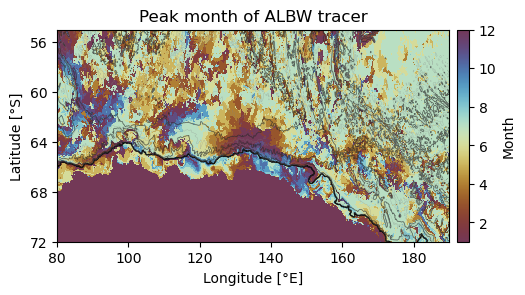

In [22]:
cm=1/2.54
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15*cm, 7*cm))

ax = plt.subplot(111)
ax.set_xlim(80, 190)
ax.set_ylim(-72, -55)
helper.fix_plot(ax=ax, ht=ht, land_mask=land_mask_masked, axes_labels=True)
pc=ax.pcolormesh(ALBW_peak_month.xt_ocean+360, ALBW_peak_month.yt_ocean, ALBW_peak_month, cmap=cmcrameri.cm.romaO)
cbar = add_colorbar(ax=ax, data=pc)
cbar.set_label('Month')
ax.set_yticks([-72, -68, -64, -60, -56])
ax.set_yticklabels(['72', '68', '64', '60', '56'])
ax.set_title('Peak month of ALBW tracer')
plt.savefig(figdir+'tracer_concetration_peak_month_ALBW_1958-2018_2'+'.png', dpi=250, bbox_inches='tight')

In [10]:
RSBW_peak_month = xr.open_dataset('/g/data/x77/ps7863/data/AABW_variability/RSBW_concentration_peak_month_1958-2018_2.nc')
RSBW_peak_month = RSBW_peak_month['passive_ross']


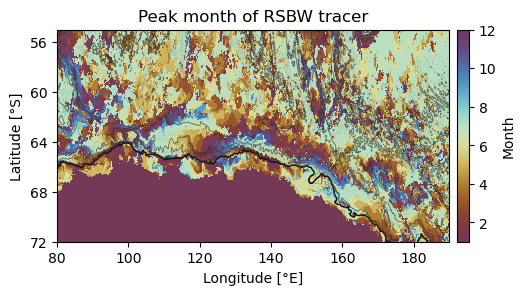

In [15]:
cm=1/2.54
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15*cm, 7*cm))

ax = plt.subplot(111)
ax.set_xlim(80, 190)
ax.set_ylim(-72, -55)
helper.fix_plot(ax=ax, ht=ht, land_mask=land_mask_masked, axes_labels=True)
pc=ax.pcolormesh(RSBW_peak_month.xt_ocean+360, RSBW_peak_month.yt_ocean, RSBW_peak_month, cmap=cmcrameri.cm.romaO)
cbar = add_colorbar(ax=ax, data=pc)
cbar.set_label('Month')
ax.set_yticks([-72, -68, -64, -60, -56])
ax.set_yticklabels(['72', '68', '64', '60', '56'])
ax.set_title('Peak month of RSBW tracer')
plt.savefig(figdir+'tracer_concetration_peak_month_RSBW_1958-2018_2'+'.png', dpi=250, bbox_inches='tight')

In the code below, the saved data used to plot maps seems to be wrong.... Check and correct ``save_data.ipynb`` prior to plotting the maps for AABW layer.

## Same but in the AABW layer

In [10]:
RSBW_peak_months = xr.open_dataset('/g/data/x77/ps7863/data/AABW_variability/RSBW_concentration_peak_month_AABW_1985-1999.nc')

In [20]:
RSBW_peak_months

<xarray.Dataset> Size: 3MB
Dimensions:                        (xt_ocean: 1100, yt_ocean: 368)
Coordinates:
  * xt_ocean                       (xt_ocean) float64 9kB -279.9 ... -170.0
  * yt_ocean                       (yt_ocean) float64 3kB -71.98 ... -55.01
Data variables:
    __xarray_dataarray_variable__  (yt_ocean, xt_ocean) int64 3MB ...

In [21]:
RSBW_peak_month = RSBW_peak_months['__xarray_dataarray_variable__']

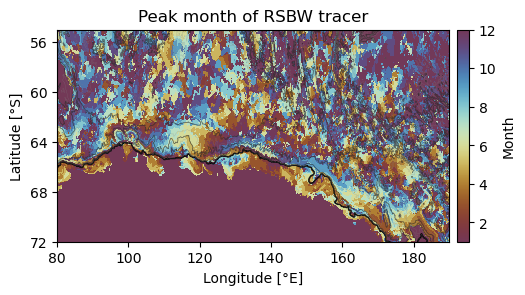

In [23]:
cm=1/2.54
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15*cm, 7*cm))

ax = plt.subplot(111)
ax.set_xlim(80, 190)
ax.set_ylim(-72, -55)
helper.fix_plot(ax=ax, ht=ht, land_mask=land_mask_masked, axes_labels=True)
pc=ax.pcolormesh(RSBW_peak_month.xt_ocean+360, RSBW_peak_month.yt_ocean, RSBW_peak_month, cmap=cmcrameri.cm.romaO)
cbar = add_colorbar(ax=ax, data=pc)
cbar.set_label('Month')
ax.set_yticks([-72, -68, -64, -60, -56])
ax.set_yticklabels(['72', '68', '64', '60', '56'])
ax.set_title('Peak month of RSBW tracer')
plt.savefig(figdir+'tracer_concetration_peak_month_RSBW_in_AABW_1985-1999'+'.png', dpi=250, bbox_inches='tight')

In [24]:
ALBW_peak_months = xr.open_dataset('/g/data/x77/ps7863/data/AABW_variability/ALBW_concentration_peak_month_AABW_1985-1999.nc')
ALBW_peak_months = ALBW_peak_months['__xarray_dataarray_variable__']

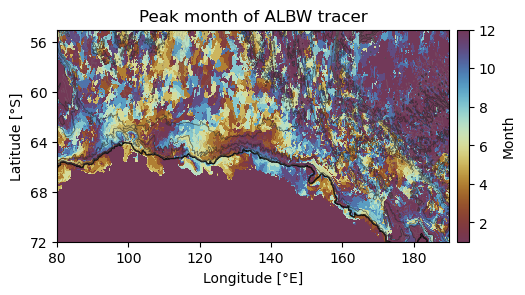

In [25]:
cm=1/2.54
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15*cm, 7*cm))

ax = plt.subplot(111)
ax.set_xlim(80, 190)
ax.set_ylim(-72, -55)
helper.fix_plot(ax=ax, ht=ht, land_mask=land_mask_masked, axes_labels=True)
pc=ax.pcolormesh(ALBW_peak_months.xt_ocean+360, ALBW_peak_months.yt_ocean, ALBW_peak_months, cmap=cmcrameri.cm.romaO)
cbar = add_colorbar(ax=ax, data=pc)
cbar.set_label('Month')
ax.set_yticks([-72, -68, -64, -60, -56])
ax.set_yticklabels(['72', '68', '64', '60', '56'])
ax.set_title('Peak month of ALBW tracer')
plt.savefig(figdir+'tracer_concetration_peak_month_ALBW_in_AABW_1985-1999'+'.png', dpi=250, bbox_inches='tight')